In [49]:
# One Dimensional Time Series Data - DBSCAN
# Math 448, UBC 2019

f = open("timestamps_n20_60mins_std0_acc120.txt", "r")
timestamps = []
for timestamp in f:
    timestamps.append(timestamp.strip())

In [50]:
timestamps

['01/01/2019 12:00 AM',
 '01/01/2019 12:11 AM',
 '01/01/2019 12:25 AM',
 '01/01/2019 12:42 AM',
 '01/01/2019 01:02 AM',
 '01/01/2019 01:26 AM',
 '01/01/2019 01:55 AM',
 '01/01/2019 02:30 AM',
 '01/01/2019 03:11 AM',
 '01/01/2019 04:01 AM',
 '01/01/2019 05:01 AM',
 '01/01/2019 06:13 AM',
 '01/01/2019 07:40 AM',
 '01/01/2019 09:23 AM',
 '01/01/2019 11:28 AM',
 '01/01/2019 01:57 PM',
 '01/01/2019 04:56 PM',
 '01/01/2019 08:31 PM',
 '01/02/2019 12:49 AM',
 '01/02/2019 05:59 AM']

In [51]:
import time
import datetime

# convert from standard time format to timestamp
for i in range(len(timestamps)):
    timestamps[i] = time.mktime(datetime.datetime.strptime(timestamps[i], "%m/%d/%Y %I:%M %p").timetuple())

In [52]:
timestamps

[1546329600.0,
 1546330260.0,
 1546331100.0,
 1546332120.0,
 1546333320.0,
 1546334760.0,
 1546336500.0,
 1546338600.0,
 1546341060.0,
 1546344060.0,
 1546347660.0,
 1546351980.0,
 1546357200.0,
 1546363380.0,
 1546370880.0,
 1546379820.0,
 1546390560.0,
 1546403460.0,
 1546418940.0,
 1546437540.0]

In [53]:
# shift data so first event is at 0
timestamps[:] = [x - timestamps[0] for x in timestamps]

In [54]:
timestamps

[0.0,
 660.0,
 1500.0,
 2520.0,
 3720.0,
 5160.0,
 6900.0,
 9000.0,
 11460.0,
 14460.0,
 18060.0,
 22380.0,
 27600.0,
 33780.0,
 41280.0,
 50220.0,
 60960.0,
 73860.0,
 89340.0,
 107940.0]

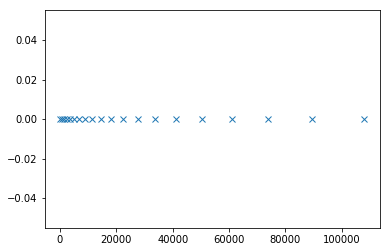

In [55]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

val = 0. # y-axis
plt.plot(timestamps, np.zeros_like(timestamps) + val, 'x')

In [60]:
# HyperParameters:
epsilon = 30*60
minNeighbours = 2

# DBSCAN Implementation

clusterLabel = 0 # use to assign timestamp to a cluster
hasCluster = np.zeros(len(timestamps))

# check if timestamp belongs to a cluster
def timestampHasCluster(i):
    return hasCluster[i] != 0

# get all timestamps j such that |i-j| ≤ epsilon
def getNeighbours(i):
    neighbours = []
    for j in range(len(timestamps)):
        if j != i and abs(timestamps[i]-timestamps[j]) <= epsilon:
            neighbours.append(j)
    return neighbours

# check if timestamp satisfies |neighbours| ≥ minNeighbours
def isCore(neighbours):
    return len(neighbours) >= minNeighbours

# assign all neighbours to same cluster as i, recursively call expandCluster on neighbours which are core points themselves
def expandCluster(i, neighbours):
    for neighbour in neighbours:
        if hasCluster[neighbour] != clusterLabel:
            hasCluster[neighbour] = clusterLabel
            neighbours_of_neighbour = getNeighbours(neighbour)
            if isCore(neighbours_of_neighbour):
                expandCluster(neighbour, neighbours_of_neighbour)

# DBSCAN
for i in range(len(timestamps)):
    if not timestampHasCluster(i):
        neighbours = getNeighbours(i)
        if isCore(neighbours):
            clusterLabel += 1
            hasCluster[i] = clusterLabel
            expandCluster(i, neighbours)

In [61]:
hasCluster

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])